# Self Driving Car Project 3 Behavioral Cloning

In [1]:
# import packages
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D

import pandas as pd
import cv2
import numpy as np

from keras.layers.core import Lambda
from keras.utils import np_utils
from keras.preprocessing import image
from keras.optimizers import Adam

from keras import backend as K
from keras.applications import VGG16

from matplotlib import pyplot as plt

from tqdm import tqdm # for the progress bar

from sklearn.model_selection import train_test_split

%matplotlib inline

Using TensorFlow backend.


## Data exploration

In [2]:
data_dir = 'data/'
sim_data = pd.read_csv(data_dir+'driving_log.csv')

In [3]:
sim_data.head(n=20)

center  \
0   IMG/center_2016_12_01_13_30_48_287.jpg   
1   IMG/center_2016_12_01_13_30_48_404.jpg   
2   IMG/center_2016_12_01_13_31_12_937.jpg   
3   IMG/center_2016_12_01_13_31_13_037.jpg   
4   IMG/center_2016_12_01_13_31_13_177.jpg   
5   IMG/center_2016_12_01_13_31_13_279.jpg   
6   IMG/center_2016_12_01_13_31_13_381.jpg   
7   IMG/center_2016_12_01_13_31_13_482.jpg   
8   IMG/center_2016_12_01_13_31_13_584.jpg   
9   IMG/center_2016_12_01_13_31_13_686.jpg   
10  IMG/center_2016_12_01_13_31_13_786.jpg   
11  IMG/center_2016_12_01_13_31_13_890.jpg   
12  IMG/center_2016_12_01_13_31_13_991.jpg   
13  IMG/center_2016_12_01_13_31_14_092.jpg   
14  IMG/center_2016_12_01_13_31_14_194.jpg   
15  IMG/center_2016_12_01_13_31_14_295.jpg   
16  IMG/center_2016_12_01_13_31_14_398.jpg   
17  IMG/center_2016_12_01_13_31_14_500.jpg   
18  IMG/center_2016_12_01_13_31_14_602.jpg   
19  IMG/center_2016_12_01_13_31_14_702.jpg   

                                     left  \
0    IMG/left_2016_12_01_13_30_48_287.jpg   
1    IMG/left_2016_12_01_13_30_48_404.jpg   
2    IMG/left_2016_12_01_13_31_12_937.jpg   
3    IMG/left_2016_12_01_13_31_13_037.jpg   
4    IMG/left_2016_12_01_13_31_13_177.jpg   
5    IMG/left_2016_12_01_13_31_13_279.jpg   
6    IMG/left_2016_12_01_13_31_13_381.jpg   
7    IMG/left_2016_12_01_13_31_13_482.jpg   
8    IMG/left_2016_12_01_13_31_13_584.jpg   
9    IMG/left_2016_12_01_13_31_13_686.jpg   
10   IMG/left_2016_12_01_13_31_13_786.jpg   
11   IMG/left_2016_12_01_13_31_13_890.jpg   
12   IMG/left_2016_12_01_13_31_13_991.jpg   
13   IMG/left_2016_12_01_13_31_14_092.jpg   
14   IMG/left_2016_12_01_13_31_14_194.jpg   
15   IMG/left_2016_12_01_13_31_14_295.jpg   
16   IMG/left_2016_12_01_13_31_14_398.jpg   
17   IMG/left_2016_12_01_13_31_14_500.jpg   
18   IMG/left_2016_12_01_13_31_14_602.jpg   
19   IMG/left_2016_12_01_13_31_14_702.jpg   

                                     right  steering  throttle  brake  \
0    IMG/right_2016_12_01_13_30_48_287.jpg       0.0       0.0    0.0   
1    IMG/right_2016_12_01_13_30_48_404.jpg       0.0       0.0    0.0   
2    IMG/right_2016_12_01_13_31_12_937.jpg       0.0       0.0    0.0   
3    IMG/right_2016_12_01_13_31_13_037.jpg       0.0       0.0    0.0   
4    IMG/right_2016_12_01_13_31_13_177.jpg       0.0       0.0    0.0   
5    IMG/right_2016_12_01_13_31_13_279.jpg       0.0       0.0    0.0   
6    IMG/right_2016_12_01_13_31_13_381.jpg       0.0       0.0    0.0   
7    IMG/right_2016_12_01_13_31_13_482.jpg       0.0       0.0    0.0   
8    IMG/right_2016_12_01_13_31_13_584.jpg       0.0       0.0    0.0   
9    IMG/right_2016_12_01_13_31_13_686.jpg       0.0       0.0    0.0   
10   IMG/right_2016_12_01_13_31_13_786.jpg       0.0       0.0    0.0   
11   IMG/right_2016_12_01_13_31_13_890.jpg       0.0       0.0    0.0   
12   IMG/right_2016_12_01_13_31_13_991.jpg       0.0       0.0    0.0   
13   IMG/right_2016_12_01_13_31_14_092.jpg       0.0       0.0    0.0   
14   IMG/right_2016_12_01_13_31_14_194.jpg       0.0       0.0    0.0   
15   IMG/right_2016_12_01_13_31_14_295.jpg       0.0       0.0    0.0   
16   IMG/right_2016_12_01_13_31_14_398.jpg       0.0       0.0    0.0   
17   IMG/right_2016_12_01_13_31_14_500.jpg       0.0       0.0    0.0   
18   IMG/right_2016_12_01_13_31_14_602.jpg       0.0       0.0    0.0   
19   IMG/right_2016_12_01_13_31_14_702.jpg       0.0       0.0    0.0   

        speed  
0   22.148290  
1   21.879630  
2    1.453011  
3    1.438419  
4    1.418236  
5    1.403993  
6    1.389892  
7    1.375934  
8    1.362115  
9    1.348435  
10   1.334892  
11   1.318820  
12   1.305575  
13   1.292579  
14   1.279884  
15   1.267316  
16   1.254873  
17   1.242555  
18   1.230361  
19   1.218291

In [4]:
sim_data.describe(percentiles=[0.1,0.25,0.5,0.75])

steering     throttle        brake        speed
count  8036.000000  8036.000000  8036.000000  8036.000000
mean      0.004070     0.869660     0.001970    28.169839
std       0.128840     0.301326     0.036565     6.149327
min      -0.942695     0.000000     0.000000     0.502490
10%      -0.135712     0.202568     0.000000    23.471400
25%       0.000000     0.985533     0.000000    30.183093
50%       0.000000     0.985533     0.000000    30.186400
75%       0.000000     0.985533     0.000000    30.186640
max       1.000000     0.985533     1.000000    30.709360

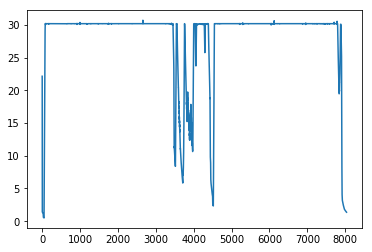

In [5]:
plt.plot(sim_data['speed'])

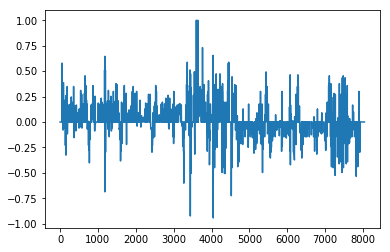

In [6]:
plt.plot(sim_data['steering'])

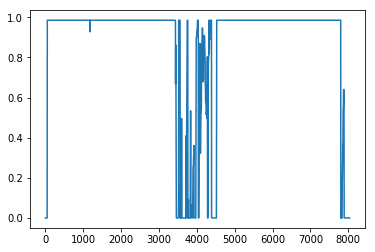

In [7]:
plt.plot(sim_data['throttle']) 

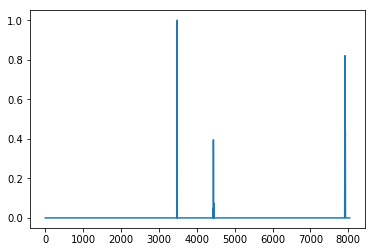

In [8]:
plt.plot(sim_data['brake'])

We find that 
There is a lot of variation in the steering angles. 
The speed, brake, and throttle remain fairly constant.

## Image Explorations

In [9]:
def plot_images(row, preprocess=lambda x: x):
    _, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))    
    # left camera
    images = plt.imread(data_dir+ row['left'].strip())
    ax1.imshow(preprocess(images))
    ax1.grid(False)
    # center camera
    images = plt.imread(data_dir+ row['center'])
    ax2.imshow(preprocess(images))
    ax2.grid(False)
    # right camera
    images = plt.imread(data_dir+ row['right'].strip())
    ax3.imshow(preprocess(images))
    ax3.grid(False)
    
# data  
print(sim_data.shape)

(8036, 7)


In [10]:
import random
#random_row = random.randint(0, sim_data.shape[0]-1)
#print(random_row)
straight_run = sim_data[sim_data['steering'] == 0.0 ]
random_row = random.randint(0, straight_run.shape[0]-1)
straight_run = straight_run.iloc[random_row]

left_turn = sim_data[(sim_data['steering'] >= 0.8) & 
                     (sim_data['steering'] <= 1.0) ]
random_row = random.randint(0, left_turn.shape[0]-1)
left_turn = left_turn.iloc[random_row]

right_turn = sim_data[(sim_data['steering'] >= -1) 
                      & (sim_data['steering'] <= -0.8) ]
random_row = random.randint(0, right_turn.shape[0]-1)
right_turn = right_turn.iloc[random_row]

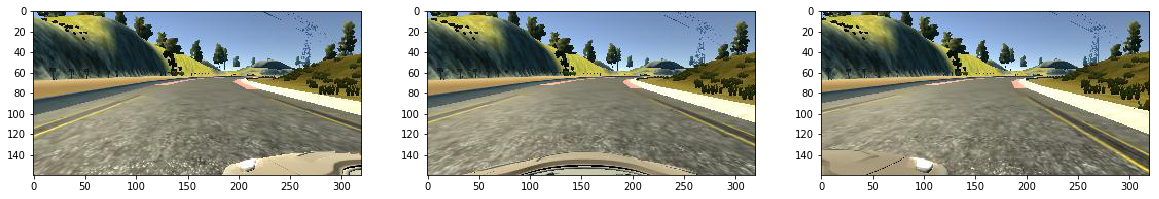

In [11]:
plot_images(straight_run)

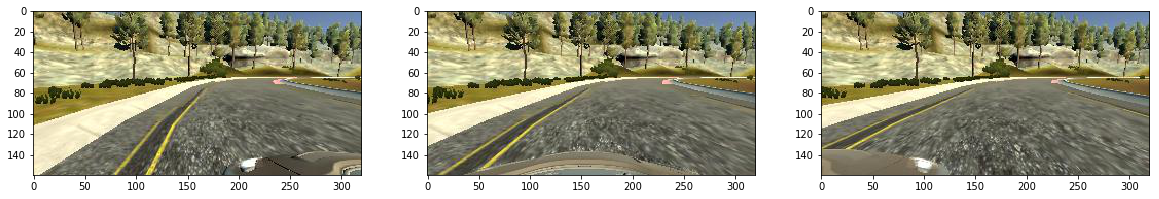

In [12]:
plot_images(left_turn)

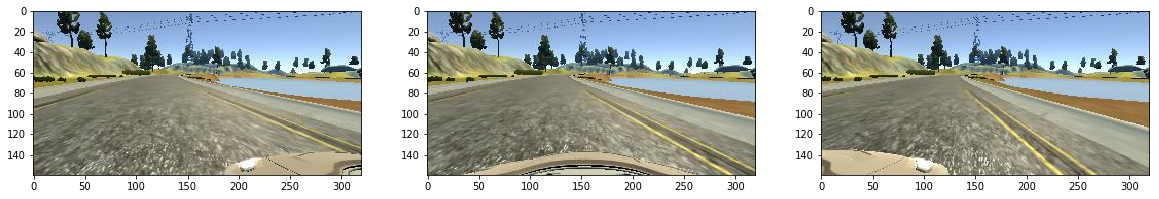

In [13]:
plot_images(right_turn)

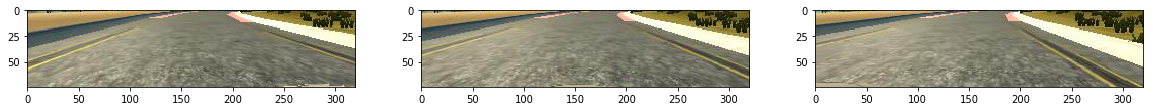

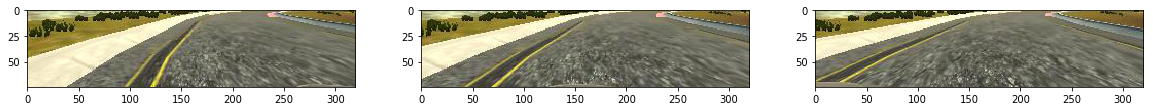

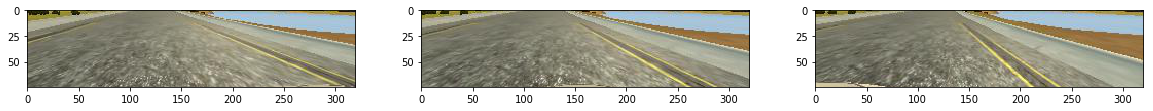

In [14]:
def cropImages(image, top=65, bottom=140):
    return image[top:bottom]

plot_images(straight_run, cropImages)
plot_images(left_turn, cropImages)
plot_images(right_turn, cropImages)

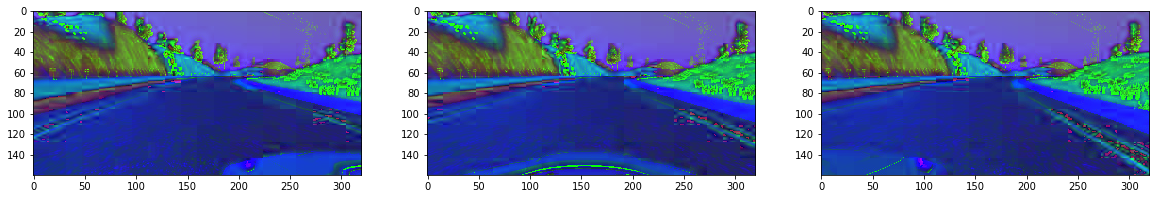

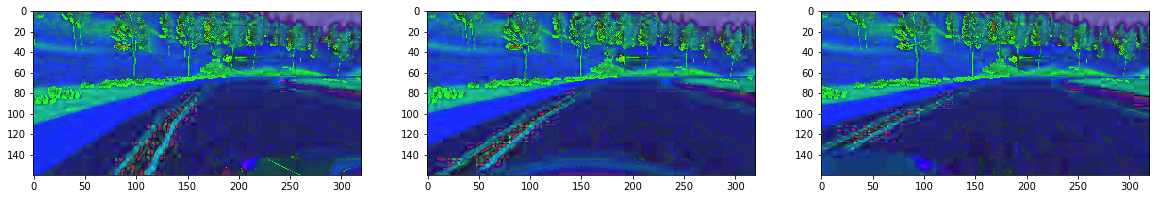

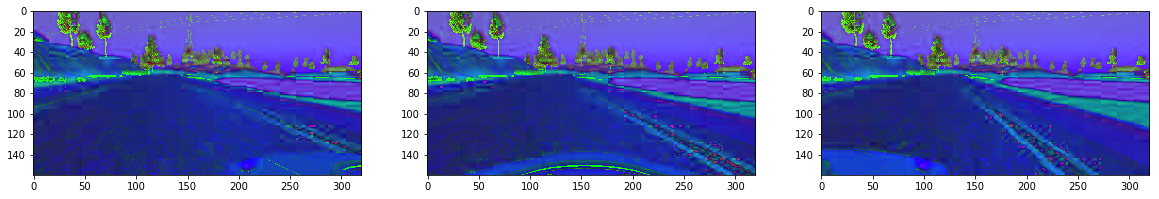

In [15]:
def convert2hsv(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

plot_images(straight_run, convert2hsv)
plot_images(left_turn, convert2hsv)
plot_images(right_turn, convert2hsv)

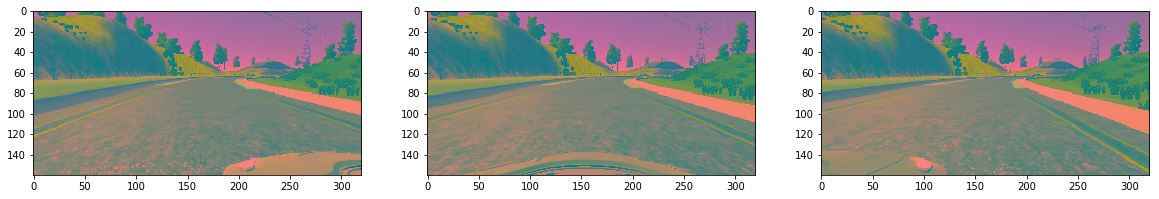

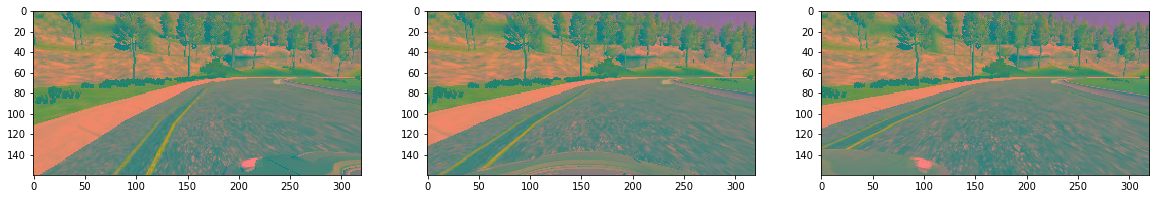

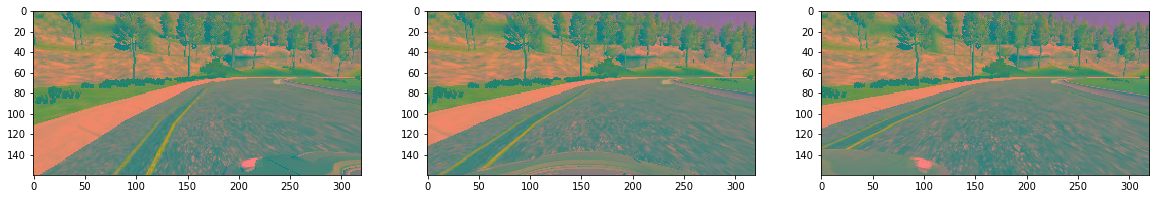

In [16]:
def convert2yuv(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
plot_images(straight_run, convert2yuv)
plot_images(left_turn, convert2yuv)
plot_images(left_turn, convert2yuv)

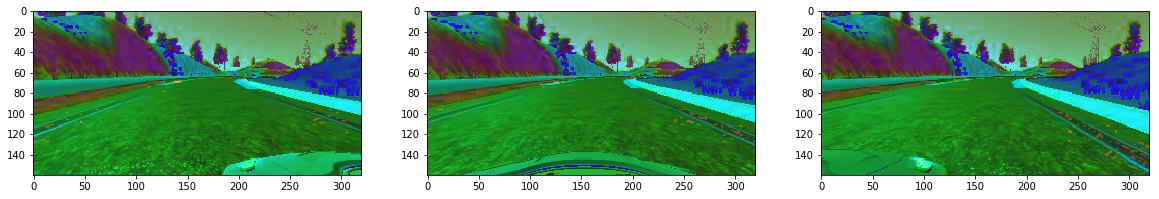

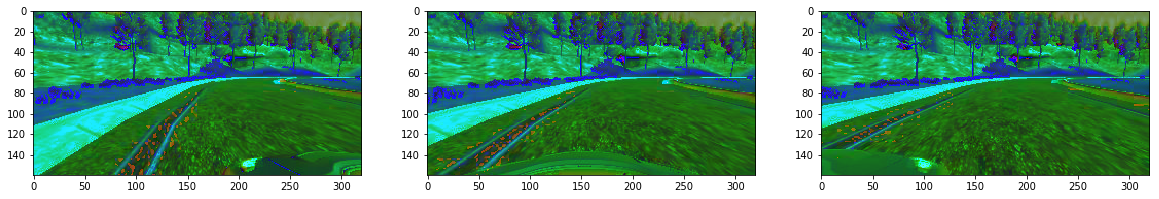

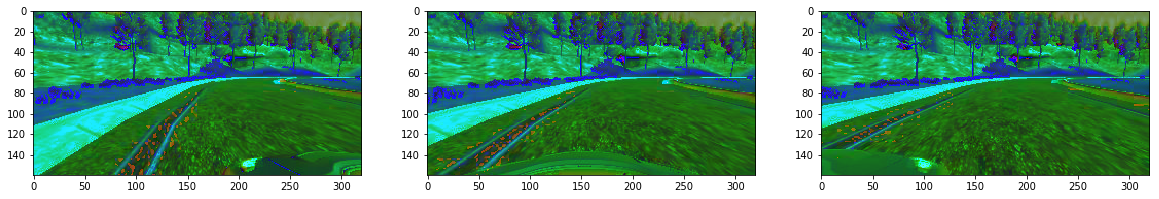

In [17]:
def convert2hls(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
plot_images(straight_run, convert2hls)
plot_images(left_turn, convert2hls)
plot_images(left_turn, convert2hls)

## Data Augmentation
The ideas explored include :
    
The data from left and right cameras are used by turning angle adjustments;

Brightness adjustment;



In [18]:
x_size = 224
y_size = 49

def prepFunc(image, xx=224, yy=49):
    return cv2.resize(cropImages(image), (xx, yy), interpolation= cv2.INTER_AREA)

def load_image(src, xx, yy, func=prepFunc):    
    return func(plt.imread(src), xx, yy)

all_images = []

for img_src in sim_data['center']:
    all_images.append(load_image(data_dir+img_src.strip(), x_size, y_size))

for img_src in sim_data['left']:
    all_images.append(load_image(data_dir+img_src.strip(), x_size, y_size))

for img_src in sim_data['right']:
    all_images.append(load_image(data_dir+img_src.strip(), x_size, y_size))


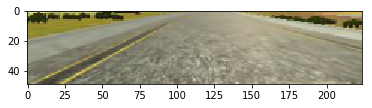

In [19]:
plt.imshow(all_images[random.randint(0, len(all_images))])

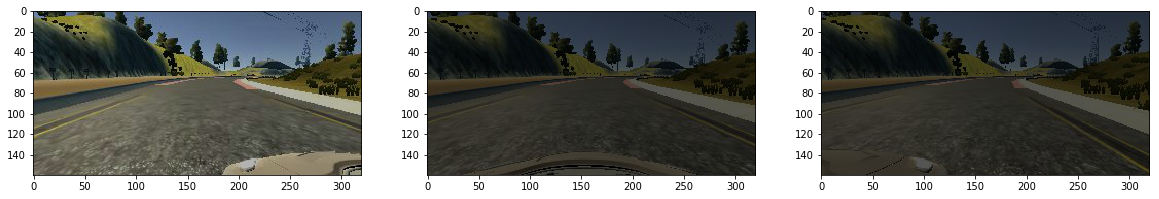

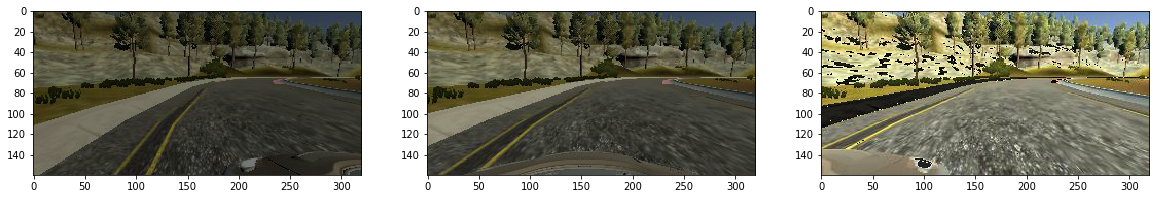

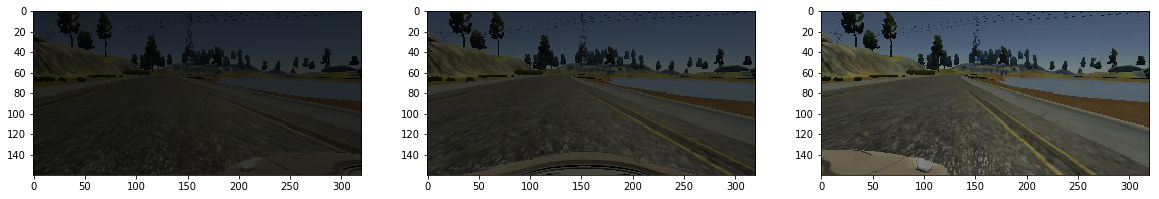

In [20]:
def augmentBrightness(image):
    delta = np.random.uniform(0.2, 1.5)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv[:,:,2] = hsv[:,:,2] * delta
    img_aug = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return img_aug

plot_images(straight_run, augmentBrightness)
plot_images(left_turn, augmentBrightness)
plot_images(right_turn, augmentBrightness)




In [21]:
"""
def trans_image(image, steer, trans_range):
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    steer_ang = steer + tr_x/trans_range*2*.2
    tr_y = 40*np.random.uniform()-40/2
    #tr_y = 0
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    image_tr = cv2.warpAffine(image,Trans_M,(cols,rows))
    
    return image_tr,steer_ang

plot(stright_run, trans_imag)
"""

'\ndef trans_image(image, steer, trans_range):\n    # Translation\n    tr_x = trans_range*np.random.uniform()-trans_range/2\n    steer_ang = steer + tr_x/trans_range*2*.2\n    tr_y = 40*np.random.uniform()-40/2\n    #tr_y = 0\n    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])\n    image_tr = cv2.warpAffine(image,Trans_M,(cols,rows))\n    \n    return image_tr,steer_ang\n\nplot(stright_run, trans_imag)\n'

In [22]:
all_images = np.asarray(all_images)
brightness_augmented = np.asarray([augmentBrightness(image) for image in all_images])
# for brightness augmentated data
all_images = np.append(all_images, brightness_augmented, axis=0)
# for flipping
all_images = np.append(all_images, all_images[:,:,::-1], axis=0) 

In [23]:
steering_angles = sim_data['steering']
angle = 0.22
steering_left  = steering_angles.copy().apply(lambda x: min(1,x+angle))
steering_right = steering_angles.copy().apply(lambda x: max(-1,x-angle))

steering_angles = steering_angles.append(steering_left)
steering_angles = steering_angles.append(steering_right)


In [24]:
steering_angles = np.asarray(steering_angles)
# for brightness augmentated data
steering_angles = np.append(steering_angles, steering_angles, axis=0)
# for flipping
steering_angles = np.append(steering_angles,-steering_angles, axis=0)


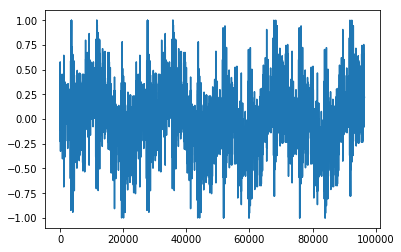

In [25]:
plt.plot(steering_angles)

In [26]:
print(all_images.shape)
print(steering_angles.shape)

(96432, 49, 224, 3)
(96432,)


Split the augmented dataset into the training and validation sets,

In [27]:
X_train, X_test, y_train, y_test = train_test_split(all_images, steering_angles, test_size=0.2)

In [28]:
train_datagen = image.ImageDataGenerator()
test_datagen = image.ImageDataGenerator()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(77145, 49, 224, 3)
(19287, 49, 224, 3)
(77145,)
(19287,)


## Nvidia End to End Learning and VGG models transfer learning
Nvidia End to End Learning for Self-Driving Cars https://arxiv.org/abs/1604.07316. 

#### 1. Nvidia End to End Learning model


In [29]:
from keras.callbacks import History 
nvidia_model_history = History()

input_shape = (y_size,x_size,3)

model_nvidia = Sequential()
model_nvidia.add(Lambda(lambda x: (x/127.5-1.0), input_shape=input_shape))
#model_nvidia.add(Convolution2D(3, 1, 1, border_mode='same', activation='relu'))
#model_nvidia.add(MaxPooling2D())
#model_nvidia.add(Dropout(0.2))
model_nvidia.add(Convolution2D(24, 5, 5, border_mode='same', activation='relu'))
model_nvidia.add(MaxPooling2D())
model_nvidia.add(Dropout(0.2))
model_nvidia.add(Convolution2D(36, 5, 5, border_mode='same', activation='relu'))
model_nvidia.add(MaxPooling2D())
model_nvidia.add(Dropout(0.2))
model_nvidia.add(Convolution2D(64, 5, 5, border_mode='same', activation='relu'))
model_nvidia.add(MaxPooling2D())
model_nvidia.add(Dropout(0.2))
model_nvidia.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model_nvidia.add(MaxPooling2D())
model_nvidia.add(Flatten())
model_nvidia.add(Dropout(0.5))
model_nvidia.add(Dense(1164, activation='relu'))
model_nvidia.add(Dropout(0.5))
model_nvidia.add(Dense(512, activation='relu'))
model_nvidia.add(Dropout(0.5))
model_nvidia.add(Dense(50, activation='relu'))
model_nvidia.add(Dropout(0.5))
model_nvidia.add(Dense(10, activation='relu'))
model_nvidia.add(Dropout(0.5))
model_nvidia.add(Dense(1)) 

model_nvidia.compile(optimizer=Adam(), loss='mse')
model_nvidia.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 49, 224, 3)    0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 49, 224, 24)   1824        lambda_1[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 24, 112, 24)   0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 24, 112, 24)   0           maxpooling2d_1[0][0]             
___________________________________________________________________________________________

#### 2.  VGG16 feature transfer

In [30]:
from keras.callbacks import History 
vgg_model_history = History()

vgg_features = VGG16(include_top=False, input_shape=input_shape, weights='imagenet')
vgg_model = Sequential()
vgg_model.add(Lambda(lambda x: (x/127.5 - 1.0),input_shape=input_shape))
# freeze the vgg layer
for l in vgg_features.layers:
    l.trainable = False
vgg_model.add(vgg_features)
vgg_model.add(Flatten())
vgg_model.add(Dropout(0.2))
vgg_model.add(Dense(256, activation='relu'))
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(10, activation='tanh'))
vgg_model.add(Dropout(0.3))
vgg_model.add(Dense(1))
vgg_model.compile(loss='mse', optimizer=Adam())
vgg_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 49, 224, 3)    0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
vgg16 (Model)                    (None, 1, 7, 512)     14714688    lambda_2[0][0]                   
____________________________________________________________________________________________________
flatten_2 (Flatten)              (None, 3584)          0           vgg16[1][0]                      
____________________________________________________________________________________________________
dropout_9 (Dropout)              (None, 3584)          0           flatten_2[0][0]                  
___________________________________________________________________________________________

#Evaluate on the mean square error metric

In [31]:
batch_size = 128

batches = train_datagen.flow(X_train, y_train, batch_size=batch_size)
test_batches = train_datagen.flow(X_test, y_test, batch_size=batch_size)

model_nvidia.fit_generator(batches, batches.n, nb_epoch=25, 
                          validation_data=test_batches, 
                          nb_val_samples=test_batches.n, 
                          verbose=1, callbacks=[nvidia_model_history])


Epoch 1/25
77145/77145 [==============================] - 226s - loss: 0.0417 - val_loss: 0.0249
Epoch 2/25
77145/77145 [==============================] - 223s - loss: 0.0245 - val_loss: 0.0151
Epoch 3/25
77145/77145 [==============================] - 223s - loss: 0.0218 - val_loss: 0.0142
Epoch 4/25
77145/77145 [==============================] - 223s - loss: 0.0208 - val_loss: 0.0130
Epoch 5/25
77145/77145 [==============================] - 223s - loss: 0.0199 - val_loss: 0.0129
Epoch 6/25
77145/77145 [==============================] - 223s - loss: 0.0194 - val_loss: 0.0116
Epoch 7/25
77145/77145 [==============================] - 222s - loss: 0.0195 - val_loss: 0.0130
Epoch 8/25
77145/77145 [==============================] - 223s - loss: 0.0191 - val_loss: 0.0113
Epoch 9/25
77145/77145 [==============================] - 223s - loss: 0.0190 - val_loss: 0.0112
Epoch 10/25
77145/77145 [==============================] - 222s - loss: 0.0189 - val_loss: 0.0123
Epoch 11/25
77145/77145 [====

In [32]:
vgg_batches = train_datagen.flow(X_train, y_train, batch_size=batch_size )
vgg_test_batches = train_datagen.flow(X_test, y_test, batch_size=batch_size)
                                      

vgg_model.fit_generator(vgg_batches, vgg_batches.n, nb_epoch=10, 
                        validation_data=vgg_test_batches, 
                        nb_val_samples=vgg_test_batches.n, verbose=1, callbacks=[vgg_model_history])

Epoch 1/10
77145/77145 [==============================] - 851s - loss: 0.3469 - val_loss: 0.0293
Epoch 2/10
77145/77145 [==============================] - 822s - loss: 0.0489 - val_loss: 0.0195
Epoch 3/10
77145/77145 [==============================] - 822s - loss: 0.0235 - val_loss: 0.0177
Epoch 4/10
77145/77145 [==============================] - 822s - loss: 0.0215 - val_loss: 0.0161
Epoch 5/10
77145/77145 [==============================] - 822s - loss: 0.0206 - val_loss: 0.0159
Epoch 6/10
77145/77145 [==============================] - 822s - loss: 0.0201 - val_loss: 0.0160
Epoch 7/10
77145/77145 [==============================] - 822s - loss: 0.0198 - val_loss: 0.0157
Epoch 8/10
77145/77145 [==============================] - 822s - loss: 0.0195 - val_loss: 0.0155
Epoch 9/10
77145/77145 [==============================] - 822s - loss: 0.0192 - val_loss: 0.0150
Epoch 10/10
77145/77145 [==============================] - 821s - loss: 0.0190 - val_loss: 0.0156


In [33]:
ordered_track = []
for img_src in tqdm(sim_data['center']):
    ordered_track.append(load_image(data_dir+img_src.strip(), x_size, y_size))

100%|██████████| 8036/8036 [00:12<00:00, 657.27it/s]


In [34]:
ordered_track  = np.asarray(ordered_track)

In [35]:
nvidia_model_predictions = model_nvidia.predict(ordered_track, batch_size=batch_size)

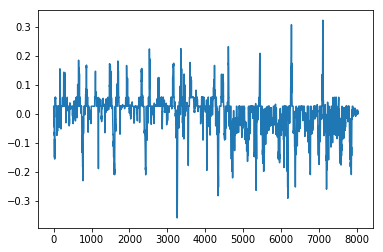

In [36]:
plt.plot(nvidia_model_predictions)

In [37]:
vgg_model_predictions = vgg_model.predict(ordered_track, batch_size=batch_size)

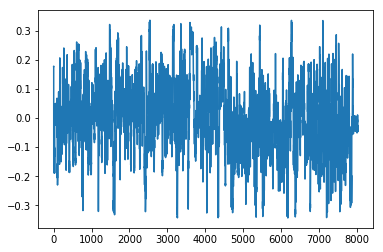

In [38]:
plt.plot(vgg_model_predictions)

Saving the models to the "models" directory

In [39]:
%mkdir "models"
%mkdir "models/nvidia"
%mkdir "models/vgg"


mkdir: cannot create directory ‘models’: File exists
mkdir: cannot create directory ‘models/nvidia’: File exists
mkdir: cannot create directory ‘models/vgg’: File exists


In [40]:
nvidia_dir = "models/nvidia/"

model_json = model_nvidia.to_json()
with open(nvidia_dir+"nvidia_model.json", "w") as json_file:
    json_file.write(model_json)

model_nvidia.save(nvidia_dir+"nvidia_model.h5")
model_nvidia.save_weights(nvidia_dir+"nvidia_model_weights.h5")



In [41]:
vgg_dir = "models/vgg/"
model_json = vgg_model.to_json()
with open(vgg_dir+"vgg_model.json", "w") as json_file:
    json_file.write(model_json)

vgg_model.save(vgg_dir+"vgg_model.h5")
vgg_model.save_weights(vgg_dir+"vgg_model_weights.h5")


In [45]:
#from keras.callbacks import History 
### print the keys contained in the history object
nvidia_model_history

print(dir(nvidia_model_history))
print(nvidia_model_history.history.keys())

### plot the training and validation loss for each epoch
plt.plot(model_nvidia_history.history['loss'])
plt.plot(model_nvidia_history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

NameError: name 'model_nvidia_history' is not defined

In [ ]:
### print the keys contained in the history object
print(vgg_model_history.history.keys())

### plot the training and validation loss for each epoch
plt.plot(vgg_model_history.history['loss'])
plt.plot(vgg_model_history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()